![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

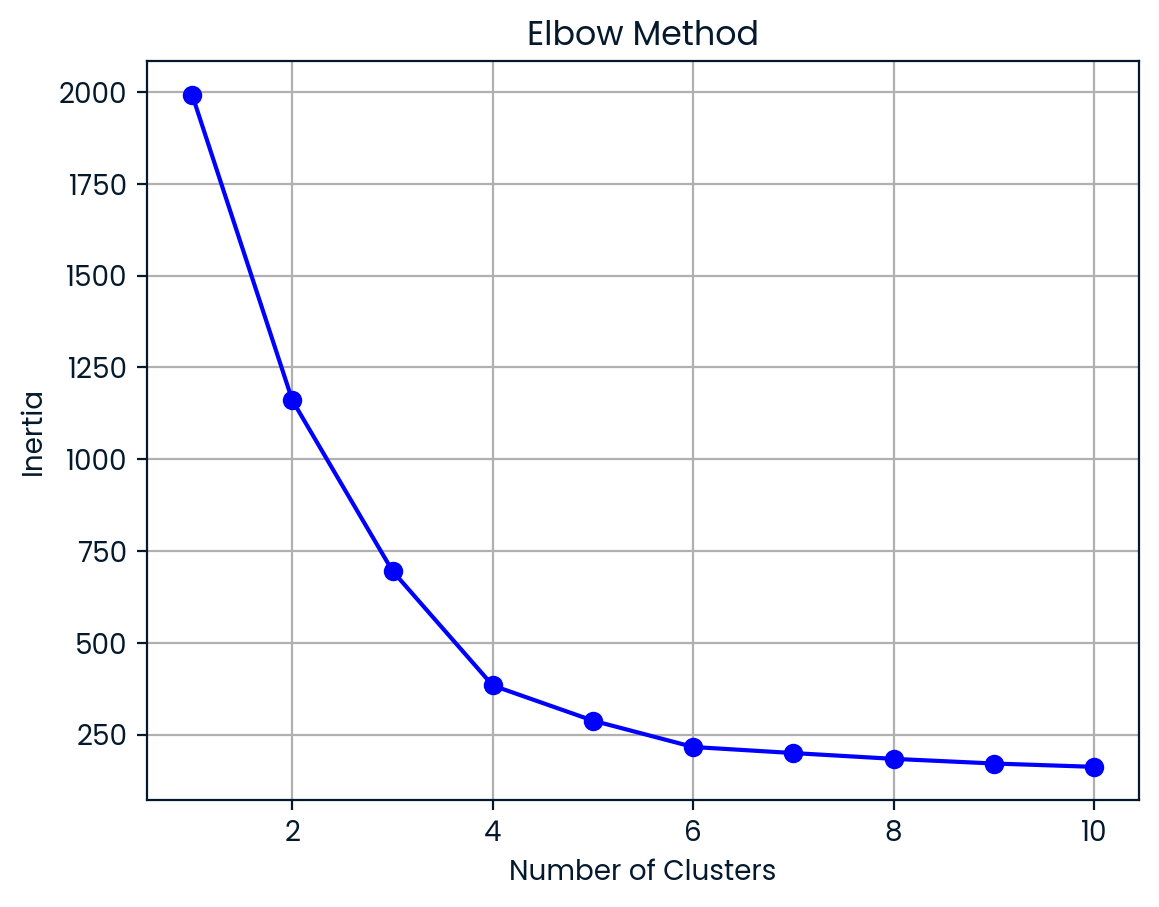

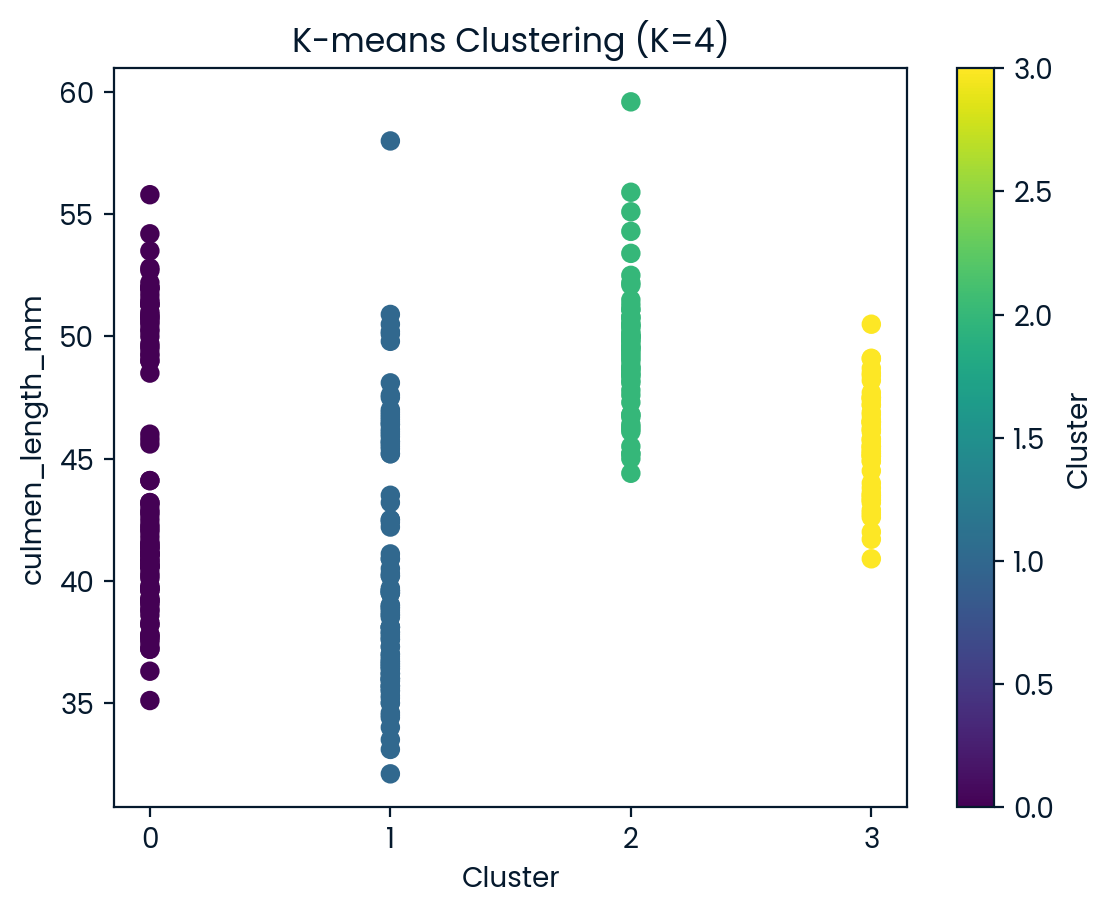

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             43.878302        19.111321         194.764151
1             40.217757        17.611215         189.046729
2             49.473770        15.718033         221.540984
3             45.563793        14.237931         212.706897


In [29]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()
# Create dummy variables that are integers rather than boolean values.
'''
for column in penguins_df.columns:
    # Check if the column is categorical 
    if penguins_df[column].dtype == 'object':  
        # Create dummy variables
        dummies = pd.get_dummies(penguins_df[column], prefix=column) 
        # To combine two dataframes
        penguins_df = pd.concat([penguins_df, dummies], axis=1)
        # To remove the original categorical columns from the dataframe
        penguins_df.drop(column, axis=1, inplace=True)
'''
penguins_df = pd.get_dummies(penguins_df, dtype='int')
scaler = StandardScaler()
# To scale data before clustering
scaled_data = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=scaled_data, columns=penguins_df.columns)  
# To store inertia values for each number of clusters to decide the ideal number
inertia_values=[]
# Range of clusters to calculate the inertia values for it
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True) # Adding grid lines for better readability
plt.show()
clusters = 4
# Run the k-means clustering algorithm once more 
kmeans = KMeans(n_clusters=clusters, random_state=42)
# Include the clusters' labels
penguins_df['label'] = kmeans.fit_predict(penguins_preprocessed)
# Visualize the clusters
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
# Matching the x-axis with cluster labels
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={num_clusters})')
plt.colorbar(label='Cluster')
plt.show()
# Select only numeric columns 
# numeric_columns = penguins_df.select_dtypes(include=['number']).columns
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
# Data is grouped based on cluster labels and calculating the mean for each cluster within a column.
stat_penguins = penguins_df[numeric_columns + ['label']].groupby('label').mean()
print(stat_penguins)